In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest


info_A1 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik_rt4_now with indo new.csv")

In [2]:
import numpy as np

# Function to remove outliers
def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_numeric = df[numeric_cols]
    iso = IsolationForest(contamination=0.05, random_state=42)
    yhat = iso.fit_predict(df_numeric)
    mask = yhat != -1
    df_cleaned = df[mask].reset_index(drop=True)
    return df_cleaned

# Remove outliers
df_cleaned = remove_outliers(info_A1)

# Identify numeric and string columns
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
string_cols = df_cleaned.select_dtypes(exclude=[np.number]).columns.tolist()

# Standardize the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned[numeric_cols])

Section 2: Initial Clustering and Evaluation (2 cluster)

In [3]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Function to evaluate clustering results
def evaluate_clustering(labels, data):
    if len(set(labels)) > 1:
        silhouette = silhouette_score(data, labels)
        db_score = davies_bouldin_score(data, labels)
        ch_score = calinski_harabasz_score(data, labels)
    else:
        silhouette, db_score, ch_score = -1, float('inf'), 0
    return silhouette, db_score, ch_score

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_data)
kmeans_silhouette, kmeans_db_score, kmeans_ch_score = evaluate_clustering(kmeans_clusters, scaled_data)

print(f'KMeans Silhouette Score: {kmeans_silhouette}')
print(f'KMeans Davies-Bouldin Index: {kmeans_db_score}')
print(f'KMeans Calinski-Harabasz Index: {kmeans_ch_score}')

# Hierarchical Clustering
hca = AgglomerativeClustering(n_clusters=2)
hca_clusters = hca.fit_predict(scaled_data)
hca_silhouette, hca_db_score, hca_ch_score = evaluate_clustering(hca_clusters, scaled_data)

print(f'Hierarchical Clustering Silhouette Score: {hca_silhouette}')
print(f'Hierarchical Clustering Davies-Bouldin Index: {hca_db_score}')
print(f'Hierarchical Clustering Calinski-Harabasz Index: {hca_ch_score}')

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(scaled_data)
dbscan_silhouette, dbscan_db_score, dbscan_ch_score = evaluate_clustering(dbscan_clusters, scaled_data)

print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')
print(f'DBSCAN Davies-Bouldin Index: {dbscan_db_score}')
print(f'DBSCAN Calinski-Harabasz Index: {dbscan_ch_score}')

# Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_clusters = gmm.fit_predict(scaled_data)
gmm_silhouette, gmm_db_score, gmm_ch_score = evaluate_clustering(gmm_clusters, scaled_data)

print(f'GMM Silhouette Score: {gmm_silhouette}')
print(f'GMM Davies-Bouldin Index: {gmm_db_score}')
print(f'GMM Calinski-Harabasz Index: {gmm_ch_score}')

# Spectral Clustering
spectral = SpectralClustering(n_clusters=2, assign_labels="discretize", random_state=42)
spectral_clusters = spectral.fit_predict(scaled_data)
spectral_silhouette, spectral_db_score, spectral_ch_score = evaluate_clustering(spectral_clusters, scaled_data)

print(f'Spectral Clustering Silhouette Score: {spectral_silhouette}')
print(f'Spectral Clustering Davies-Bouldin Index: {spectral_db_score}')
print(f'Spectral Clustering Calinski-Harabasz Index: {spectral_ch_score}')


KMeans Silhouette Score: 0.23290825141701335
KMeans Davies-Bouldin Index: 1.437932831849498
KMeans Calinski-Harabasz Index: 174.83119480841498
Hierarchical Clustering Silhouette Score: 0.2745418453896907
Hierarchical Clustering Davies-Bouldin Index: 1.2500237002402623
Hierarchical Clustering Calinski-Harabasz Index: 145.96076598468525
DBSCAN Silhouette Score: -1
DBSCAN Davies-Bouldin Index: inf
DBSCAN Calinski-Harabasz Index: 0
GMM Silhouette Score: 0.23290825141701335
GMM Davies-Bouldin Index: 1.437932831849498
GMM Calinski-Harabasz Index: 174.83119480841498


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clustering Silhouette Score: -0.0012525920977655871
Spectral Clustering Davies-Bouldin Index: 27.844743511268014
Spectral Clustering Calinski-Harabasz Index: 0.4784361979006498


Section 3: Hyperparameter Tuning

In [4]:
from skopt import BayesSearchCV
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Define the parameter search space for KMeans
param_space_kmeans = {
    'n_clusters': (2, 10),
    'init': ['k-means++', 'random'],
    'n_init': (10, 30),
    'max_iter': (300, 1000)
}

# Custom scorer for KMeans
def kmeans_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Bayesian optimization for KMeans
bayes_search_kmeans = BayesSearchCV(
    estimator=KMeans(random_state=42),
    search_spaces=param_space_kmeans,
    n_iter=32,
    scoring=kmeans_scorer,
    cv=3,
    n_jobs=-1,
    random_state=42
)

# Perform the search
bayes_search_kmeans.fit(scaled_data)

# Best parameters and score
best_kmeans_params = bayes_search_kmeans.best_params_
best_kmeans_score = bayes_search_kmeans.best_score_

print(f'Best KMeans parameters: {best_kmeans_params}')
print(f'Best KMeans silhouette score: {best_kmeans_score}')

#############################################################################################################

# Define the parameter search space for Hierarchical Clustering (HCA)
param_space_hca = {
    'n_clusters': (2, 10),
    'linkage': ['ward', 'complete', 'average', 'single'],
}

# Custom scorer for HCA
def hca_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Bayesian optimization for HCA
bayes_search_hca = BayesSearchCV(
    estimator=AgglomerativeClustering(),
    search_spaces=param_space_hca,
    n_iter=32,
    scoring=hca_scorer,
    cv=3,
    n_jobs=-1,
    random_state=42
)

# Perform the search
bayes_search_hca.fit(scaled_data)

# Best parameters and score
best_hca_params = bayes_search_hca.best_params_
best_hca_score = bayes_search_hca.best_score_

print(f'Best HCA parameters: {best_hca_params}')
print(f'Best HCA silhouette score: {best_hca_score}')

#############################################################################################################

# Define the parameter search space for DBSCAN
param_space_dbscan = {
    'eps': (0.1, 1.0, 'uniform'),
    'min_samples': (3, 20),
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': (1, 5)  # Adding the 'p' parameter for Minkowski metric
}

# Custom scorer for DBSCAN
def dbscan_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    if len(set(labels)) > 1 and -1 in labels:
        score = silhouette_score(X[labels != -1], labels[labels != -1])
    else:
        score = -1  # No valid clusters
    return score

# Bayesian optimization for DBSCAN
bayes_search_dbscan = BayesSearchCV(
    estimator=DBSCAN(),
    search_spaces=param_space_dbscan,
    n_iter=32,
    scoring=dbscan_scorer,
    cv=3,
    n_jobs=-1,
    random_state=42
)

# Perform the search
bayes_search_dbscan.fit(scaled_data)

# Best parameters and score
best_dbscan_params = bayes_search_dbscan.best_params_
best_dbscan_score = bayes_search_dbscan.best_score_

print(f'Best DBSCAN parameters: {best_dbscan_params}')
print(f'Best DBSCAN silhouette score: {best_dbscan_score}')


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best KMeans parameters: OrderedDict({'init': 'random', 'max_iter': 967, 'n_clusters': 2, 'n_init': 30})
Best KMeans silhouette score: 0.39311934808127885


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('complete'), np.int64(2)] before, using random point ['complete', np.int64(3)]
  warnings.warn(
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('average'), np.int64(2)] before, using random point ['single', np.int64(7)]
  warnings.warn(
c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated a

Best HCA parameters: OrderedDict({'linkage': 'average', 'n_clusters': 2})
Best HCA silhouette score: 0.5049299125973783


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best DBSCAN parameters: OrderedDict({'algorithm': 'ball_tree', 'eps': 0.7549531688595925, 'metric': 'minkowski', 'min_samples': 8, 'p': 4})
Best DBSCAN silhouette score: -1.0


Section 4: Evaluation with Best Parameters

In [5]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Function to evaluate clustering results
def evaluate_clustering(labels, data):
    if len(set(labels)) > 1:
        silhouette = silhouette_score(data, labels)
        db_score = davies_bouldin_score(data, labels)
        ch_score = calinski_harabasz_score(data, labels)
    else:
        silhouette, db_score, ch_score = -1, float('inf'), 0
    return silhouette, db_score, ch_score

# Initialize dictionaries to store results
final_results = {}

# KMeans evaluation
kmeans = KMeans(n_clusters=best_kmeans_params['n_clusters'], random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_data)
kmeans_silhouette, kmeans_db_score, kmeans_ch_score = evaluate_clustering(kmeans_clusters, scaled_data)

final_results['KMeans'] = {
    'Silhouette Score': kmeans_silhouette,
    'Davies-Bouldin Index': kmeans_db_score,
    'Calinski-Harabasz Index': kmeans_ch_score
}

print(f"KMeans (tuned): {final_results['KMeans']}")

# HCA evaluation
hca = AgglomerativeClustering(n_clusters=best_hca_params['n_clusters'], linkage=best_hca_params['linkage'])
hca_clusters = hca.fit_predict(scaled_data)
hca_silhouette, hca_db_score, hca_ch_score = evaluate_clustering(hca_clusters, scaled_data)

final_results['HCA'] = {
    'Silhouette Score': hca_silhouette,
    'Davies-Bouldin Index': hca_db_score,
    'Calinski-Harabasz Index': hca_ch_score
}

print(f"HCA (tuned): {final_results['HCA']}")

# DBSCAN evaluation
dbscan = DBSCAN(eps=best_dbscan_params['eps'], min_samples=best_dbscan_params['min_samples'])
dbscan_clusters = dbscan.fit_predict(scaled_data)
dbscan_silhouette, dbscan_db_score, dbscan_ch_score = evaluate_clustering(dbscan_clusters, scaled_data)

final_results['DBSCAN'] = {
    'Silhouette Score': dbscan_silhouette,
    'Davies-Bouldin Index': dbscan_db_score,
    'Calinski-Harabasz Index': dbscan_ch_score
}

print(f"DBSCAN (tuned): {final_results['DBSCAN']}")


KMeans (tuned): {'Silhouette Score': np.float64(0.23290825141701335), 'Davies-Bouldin Index': np.float64(1.437932831849498), 'Calinski-Harabasz Index': np.float64(174.83119480841498)}
HCA (tuned): {'Silhouette Score': np.float64(0.6068785049051894), 'Davies-Bouldin Index': np.float64(0.5591848171836278), 'Calinski-Harabasz Index': np.float64(85.5364099760036)}
DBSCAN (tuned): {'Silhouette Score': -1, 'Davies-Bouldin Index': inf, 'Calinski-Harabasz Index': 0}


Section 5: Visualization of Clustering Results

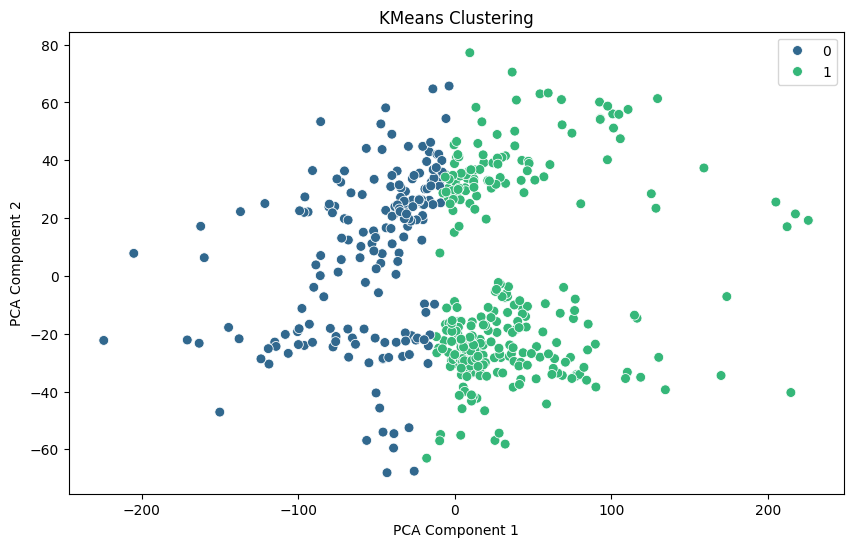

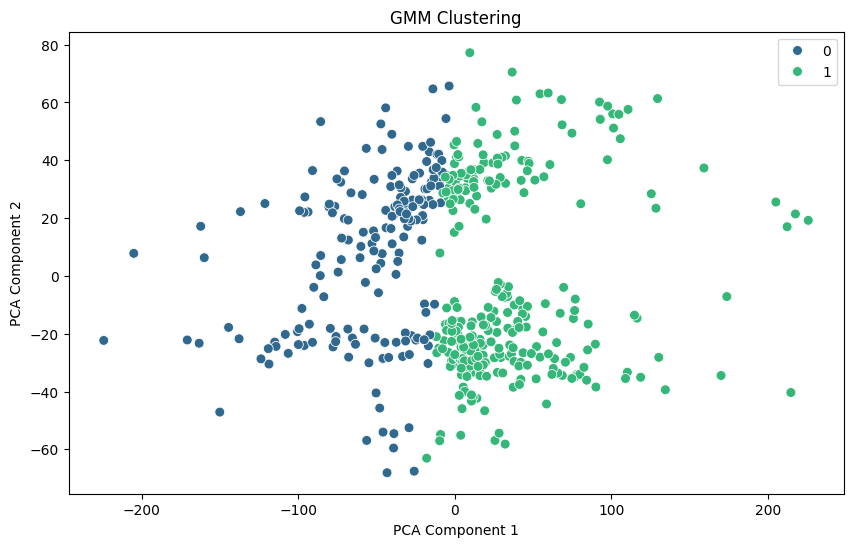

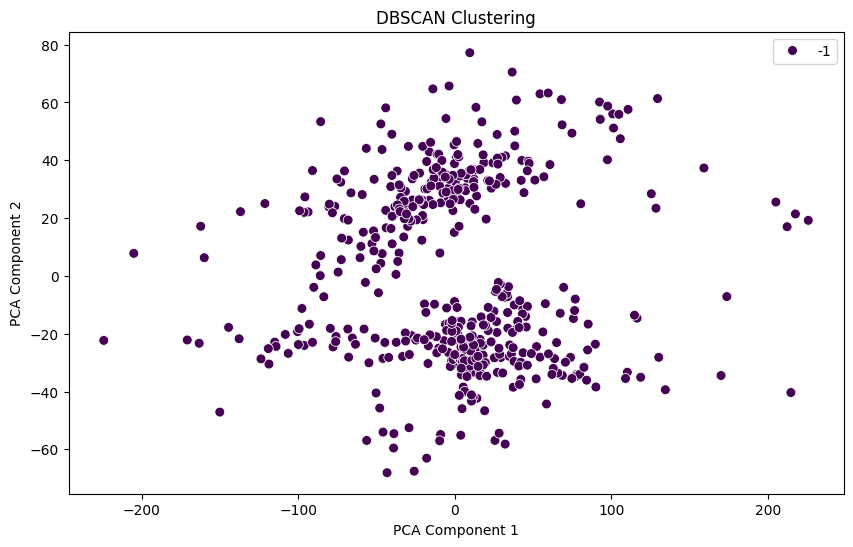

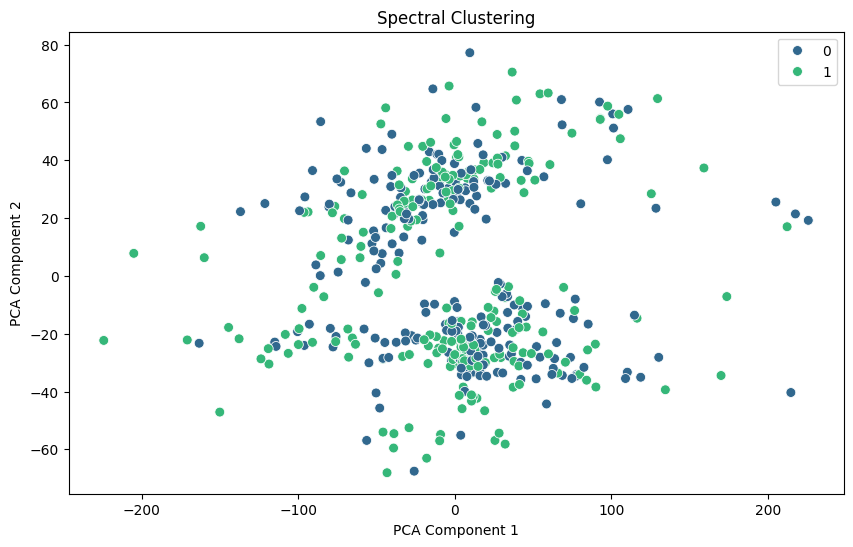

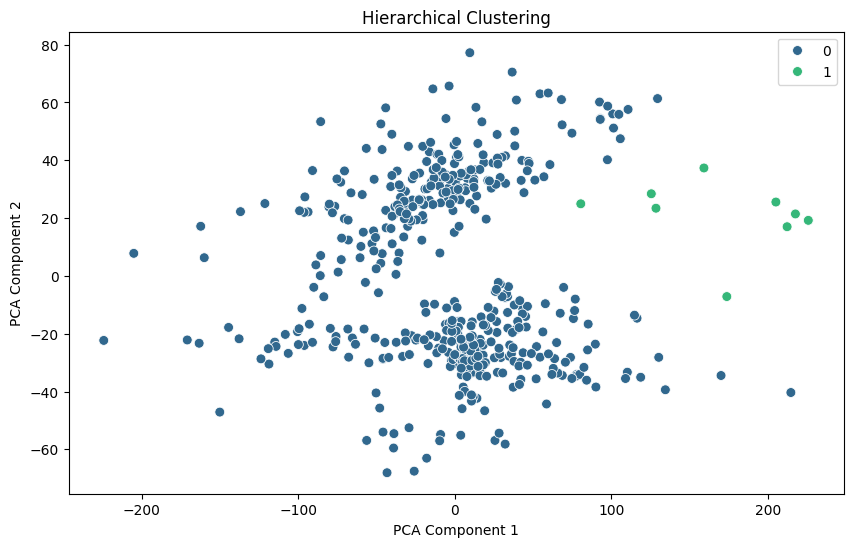

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Function to plot clusters
def plot_clusters(data, labels, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='viridis', s=50)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(loc='best')
    plt.show()

# Plot KMeans clusters
plot_clusters(pca_data, kmeans_clusters, 'KMeans Clustering')

# Plot GMM clusters
plot_clusters(pca_data, gmm_clusters, 'GMM Clustering')

# Plot DBSCAN clusters
plot_clusters(pca_data, dbscan_clusters, 'DBSCAN Clustering')

# Plot Spectral Clustering clusters
plot_clusters(pca_data, spectral_clusters, 'Spectral Clustering')

# Plot Hierarchical Clustering clusters
plot_clusters(pca_data, hca_clusters, 'Hierarchical Clustering')


Summary of Results

In [7]:
print("Summary of Clustering Results:")
for method, scores in final_results.items():
    print(f"\n{method}:")
    for metric, score in scores.items():
        print(f"  {metric}: {score}")


Summary of Clustering Results:

KMeans:
  Silhouette Score: 0.23290825141701335
  Davies-Bouldin Index: 1.437932831849498
  Calinski-Harabasz Index: 174.83119480841498

HCA:
  Silhouette Score: 0.6068785049051894
  Davies-Bouldin Index: 0.5591848171836278
  Calinski-Harabasz Index: 85.5364099760036

DBSCAN:
  Silhouette Score: -1
  Davies-Bouldin Index: inf
  Calinski-Harabasz Index: 0
